### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [4]:
df = pd.read_csv('total_sales.csv')

In [5]:
df.head()

,Unnamed: 0,ITM_CD,itm_nma,PRC,QTY,TR_NO,USR,RMRK,SUM_CD,Crtd,PRC1,LN_NO,total_price,Date,Time
0,0,6001,حواوشى لحم عالفحم,25.0,2.0,2,احمد,NaN,1.0,2023-11-18 16:30:22,25.0,1,50.0,2023-11-18,16:30:22
1,1,6002,حواوشى سجق عالفحم,25.0,2.0,2,احمد,NaN,1.0,2023-11-18 16:38:45,25.0,2,50.0,2023-11-18,16:38:45
2,2,2001,سندوتش شيش طاووق بلدى,25.0,1.0,3,احمد,NaN,1.0,2023-11-18 17:00:40,25.0,1,25.0,2023-11-18,17:00:40
3,3,1002,سندوتش كفته بلدى كبير,20.0,1.0,3,احمد,NaN,1.0,2023-11-18 17:00:48,20.0,2,20.0,2023-11-18,17:00:48
4,4,6003,حواوشى ميكس عالفحم,30.0,1.0,3,احمد,NaN,1.0,2023-11-18 17:00:56,30.0,3,30.0,2023-11-18,17:00:56


In [6]:
# Drop Unnecessary Columns
df.drop(columns=['Unnamed: 0','RMRK'],inplace=True)

### Check If Null

In [8]:
df.isnull().sum()

ITM_CD         0
itm_nma        0
PRC            0
QTY            0
TR_NO          0
USR            0
SUM_CD         3
Crtd           0
PRC1           0
LN_NO          0
total_price    0
Date           0
Time           0
dtype: int64

### Check If Duplicate

In [10]:
df.duplicated().sum()

0

### Check Columns Format

In [12]:
df.dtypes

ITM_CD           int64
itm_nma         object
PRC            float64
QTY            float64
TR_NO            int64
USR             object
SUM_CD         float64
Crtd            object
PRC1           float64
LN_NO            int64
total_price    float64
Date            object
Time            object
dtype: object

In [13]:
df['Crtd'] = df['Crtd'].astype('datetime64[ns]')
df['Month'] = df['Crtd'].dt.month
df['Year'] = df['Crtd'].dt.year

In [14]:
df.loc[df['Crtd'].dt.year == 2027, 'Crtd'] = df.loc[df['Crtd'].dt.year==2027,'Crtd'] - pd.DateOffset(years=3)

### Bivariate / Multivariate Analysis

In [16]:
# Top 10 Products In Sales
df.groupby('itm_nma')['QTY'].sum().reset_index().sort_values('QTY', ascending=False).head(10)

,itm_nma,QTY
136,سندوتش كفته بلدى صغير,65149.0
63,حواوشى لحم عالفحم,38947.0
96,سماش برجر سنجل,28718.0
137,سندوتش كفته بلدى كبير,18432.0
16,اضافه جبنه,16227.0
120,سندوتش شيش طاووق بلدى,15821.0
36,بطاطس سورى ع سورى,13860.0
62,حواوشى سجق عالفحم,10391.0
52,تشيكن رانش برجر,9807.0
115,سندوتش سجق مشوى بلدى,9705.0


In [17]:
# 1 Date

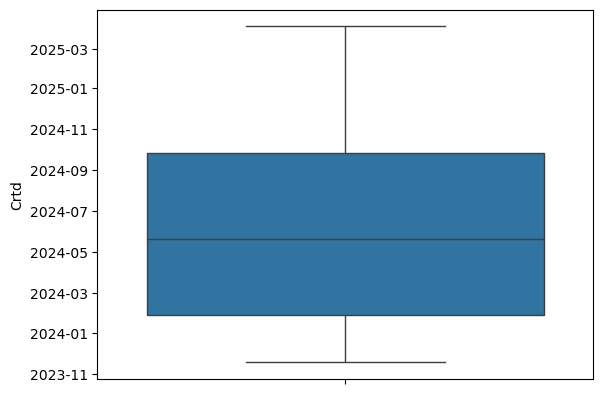

In [18]:
sns.boxplot(df['Crtd']);

In [19]:
# 2- Quantity

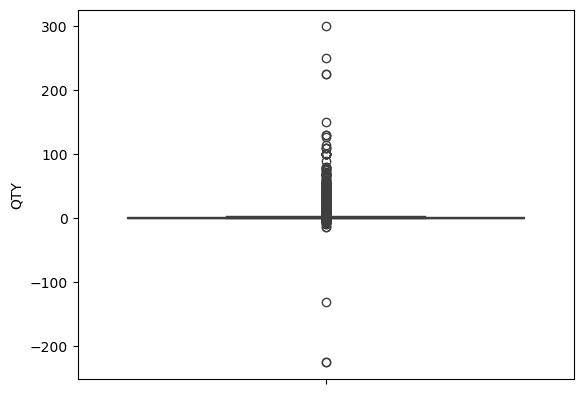

In [20]:
sns.boxplot(df['QTY']);

In [21]:
# Outliers of QTY are necessary
# Negative is for cancelled orderes
# all the orders over 100 QTY are correct

In [22]:
### Analyza monthly Sales

In [23]:
df['Year_Month'] = df['Crtd'].dt.strftime('%Y-%m')

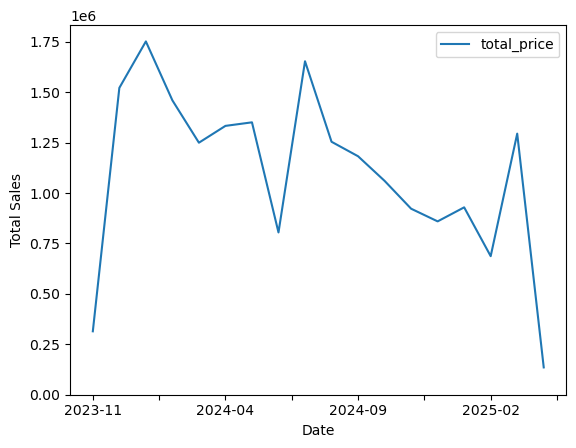

In [24]:

pd.DataFrame(df.groupby('Year_Month')['total_price'].sum()).plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.ylim(0,);

In [25]:
# Sales Over Hour
df['Hour'] = df['Crtd'].dt.hour
a = df.groupby('Hour')['total_price'].sum()
total  = a / df['Date'].nunique()

<Axes: xlabel='Hour'>

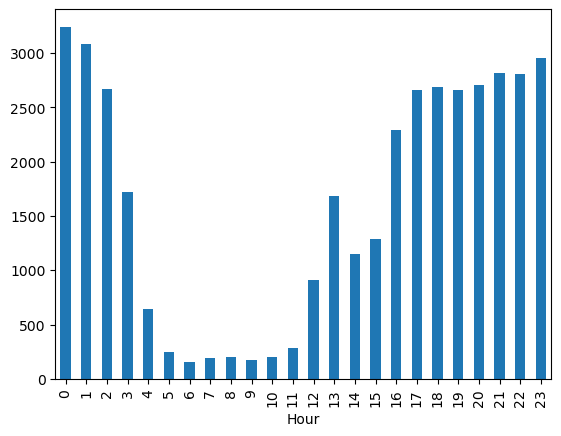

In [26]:
total.plot(kind='bar')

In [27]:
df['Day'] = df['Crtd'].dt.day_name()

In [28]:
df['Day'].value_counts()

Day
Friday       39673
Thursday     35014
Saturday     34549
Monday       32933
Sunday       32571
Wednesday    31706
Tuesday      31030
Name: count, dtype: int64

In [29]:
# Sales Over Day

In [30]:
daily_sales = df.groupby(['Date', 'Day'])['total_price'].sum().reset_index()

In [31]:
b = daily_sales['Day'].value_counts()
top_days = daily_sales.groupby('Day')['total_price'].sum().reindex(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])/b

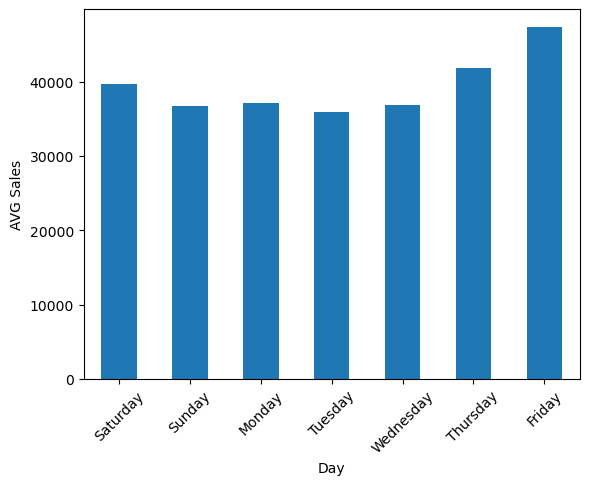

In [32]:
top_days.plot(kind='bar', rot = 45)
plt.xlabel('Day')
plt.ylabel('AVG Sales');

In [33]:
df.drop(columns=['ITM_CD','SUM_CD','USR','LN_NO'],inplace=True)

In [34]:
df.to_csv('Clean_sales_date.csv')